In [1]:
import pandas as pd
import seaborn as sns
import gradio as gr
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Loading dataset
data = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

In [3]:
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
#preprocessing
bins = (0,0.2, 1)
group_names = ["at risk", "healthy"]
data['HeartDiseaseorAttack'] = pd.cut( data["HeartDiseaseorAttack"], bins = bins, labels = group_names )
data["HeartDiseaseorAttack"].unique()

[NaN, 'healthy']
Categories (2, object): ['at risk' < 'healthy']

In [7]:
label_hearta = LabelEncoder()

In [8]:
data['HeartDiseaseorAttack'] = label_hearta.fit_transform(data['HeartDiseaseorAttack'])

In [9]:
data.head(10)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,1,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,1,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,1,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,1,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [10]:
data['HeartDiseaseorAttack'].value_counts()

1    229787
0     23893
Name: HeartDiseaseorAttack, dtype: int64

C:\Users\earth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

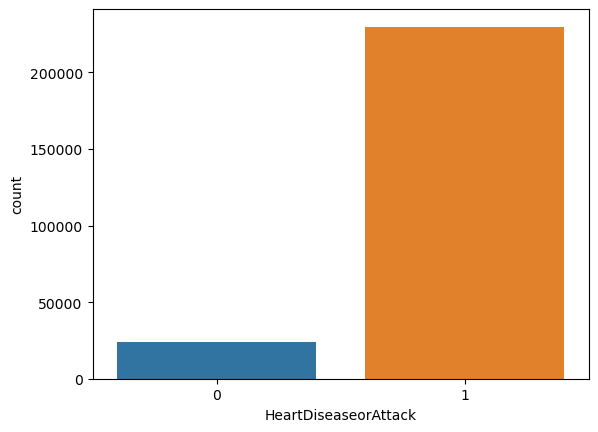

In [11]:
sns.countplot(data['HeartDiseaseorAttack'])

In [12]:
#Seperate
X = data.drop('HeartDiseaseorAttack', axis = 1)
y = data['HeartDiseaseorAttack']

In [13]:
#Train test splitting data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, random_state = 42)

In [14]:
#Apply standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [19]:
#Random Classifier
rfc = RandomForestClassifier( n_estimators = 200 )
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [16]:
# #See how model perform
# print( classification_report(y_test, pred_rfc))
# print( confusion_matrix(y_test, pred_rfc))

In [20]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.9037271365499843

In [21]:
data.head(10)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,1,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,1,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,1,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,1,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [ ]:
def pred(bp,chol,cholcheck, bmi, smoker, stroke, diabetes, physActivity, fruits, 
         veggies, hvyalcoholconsump, anyhealthcare, nodocbccost, genHlth, mentHlth, physHlth, diffwalk, sex, age, education, income):
    
    Xnew = [ [bp,chol,cholcheck, bmi, smoker, stroke, diabetes, physActivity, fruits, 
         veggies, hvyalcoholconsump, anyhealthcare, nodocbccost, genHlth, mentHlth, physHlth, diffwalk, sex, age, education, income] ] #Enter input here  1 for yes, 0 for no : High Blood Pressure, HighChol, CholCheck, BMI, Smoker, Stroke, Diabetes, PhysActivity, Fruits, Veggies, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income
    #Output: 1 is healthy, 0 is risky
    Xnew = sc.transform(Xnew)
    ynew= rfc.predict(Xnew)
    return ynew

interface = gr.Interface(fn = pred, 
                                       inputs = [gr.inputs.Textbox(lines = 1, placeholder =  "HighBP"),
                                                 gr.inputs.Textbox(lines = 1, placeholder = "High Cholesterol?, Yes(1) or No(0)"),
                                                 gr.inputs.Textbox(lines = 1, placeholder = "Cholesterol Check?, Yes(1) or No(0)"),
                                                 gr.inputs.Textbox(lines = 1, placeholder = "BMI"),
                                                 gr.inputs.Textbox(lines = 1, placeholder = "Smoker?, Yes(1) or No(0)"),
                                                 gr.inputs.Textbox(lines = 1, placeholder = "Stroke?, Yes(1) or No(0)"),
                                                 gr.inputs.Textbox(lines = 1, placeholder = "Diabetes?, Yes(1) or No(0)"), 
                                                 gr.inputs.Textbox(lines = 1, placeholder = "PhysActivity, day(s)/week"),
                                                 gr.inputs.Textbox(lines = 1, placeholder = "Fruits?, Yes(1) or No(0)"),
                                                 gr.inputs.Textbox(lines = 1, placeholder = "Veggies?, Yes(1) or No(0)"),
                                                 gr.inputs.Textbox(lines = 1, placeholder = "HvyAlcoholConsump?, Yes(1) or No(0)"), 
                                                 gr.inputs.Textbox(lines = 1, placeholder = "AnyHealthcare?, Yes(1) or No(0)"),
                                                 gr.inputs.Textbox(lines = 1, placeholder = "NoDocbcCost?, Yes(1) or No(0)"),
                                                 gr.inputs.Textbox(lines = 1, placeholder = "GenHlth?, Good(1) or Bad(0)"),
                                                 gr.inputs.Textbox(lines = 1, placeholder = "MentHlth?, Good(1) or Bad(0)"),
                                                 gr.inputs.Textbox(lines = 1, placeholder = "PhysHlth?, Good(1) or Bad(0)"),
                                                 gr.inputs.Textbox(lines = 1, placeholder = "DiffWalk?, Yes(1) or No(0)"),
                                                 gr.inputs.Textbox(lines = 1, placeholder = "Sex?, Male(1) or Female(0)"),
                                                 gr.inputs.Textbox(lines = 1, placeholder = "Age"),
                                                 gr.inputs.Textbox(lines = 1, placeholder = "Education?, Yes(1) or No(0)"),
                                                 gr.inputs.Textbox(lines = 1, placeholder = "Income?, High(1) or Low(0)")],
                                      outputs = "text"
    )
interface.launch(debug = True, share = True)

C:\Users\earth\anaconda3\lib\site-packages\gradio\inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\earth\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\earth\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

Could not create share link, please check your internet connection.


C:\Users\earth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\earth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\earth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
